In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

In [3]:
X, y = make_classification(n_classes=2, n_samples=1000, n_features=10, n_informative=7)

In [4]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.7, random_state=245)

In [6]:
model = LogisticRegression()

In [7]:
model.fit(X_tr, y_tr)

LogisticRegression()

In [8]:
y_pr = model.predict(X_te)

In [9]:
accuracy_score(y_te, y_pr)

0.6933333333333334

In [10]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       154
           1       0.68      0.71      0.69       146

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300



In [11]:
confusion_matrix(y_te, y_pr)

array([[105,  49],
       [ 43, 103]], dtype=int64)

In [12]:
y_prob = model.predict_proba(X_te)[:, 1]

In [13]:
y_prob

array([0.83490739, 0.74255145, 0.35746246, 0.47560284, 0.67460063,
       0.45862641, 0.63623708, 0.43914651, 0.66924068, 0.12251359,
       0.10889332, 0.79344295, 0.94728529, 0.85896657, 0.60571785,
       0.19115754, 0.32763517, 0.45938562, 0.48643272, 0.6320246 ,
       0.47648069, 0.4112087 , 0.40356917, 0.23344295, 0.85232286,
       0.4855866 , 0.58107905, 0.4631421 , 0.47370131, 0.5210001 ,
       0.43500678, 0.33612569, 0.35019161, 0.42303749, 0.3599488 ,
       0.70186719, 0.80397933, 0.67298696, 0.41094074, 0.65233642,
       0.84743075, 0.4109977 , 0.83400452, 0.10611789, 0.70021724,
       0.85867508, 0.40533658, 0.79737246, 0.47476099, 0.83928673,
       0.34672443, 0.72626492, 0.09820967, 0.28433349, 0.31285856,
       0.21830892, 0.52334393, 0.87132221, 0.81196135, 0.46275161,
       0.80746909, 0.32337291, 0.23950073, 0.5423232 , 0.2389893 ,
       0.86081365, 0.33241736, 0.885507  , 0.5677484 , 0.86882542,
       0.5005354 , 0.47597481, 0.7736834 , 0.65848111, 0.13179

In [14]:
fpr, tpr, threshold = roc_curve(y_te, y_prob)

In [15]:
fpr, tpr, threshold

(array([0.        , 0.        , 0.        , 0.00649351, 0.00649351,
        0.01298701, 0.01298701, 0.01948052, 0.01948052, 0.02597403,
        0.02597403, 0.03246753, 0.03246753, 0.04545455, 0.04545455,
        0.05844156, 0.05844156, 0.06493506, 0.06493506, 0.07142857,
        0.07142857, 0.07792208, 0.07792208, 0.08441558, 0.08441558,
        0.09090909, 0.09090909, 0.1038961 , 0.1038961 , 0.11038961,
        0.11038961, 0.12337662, 0.12337662, 0.14285714, 0.14285714,
        0.15584416, 0.15584416, 0.16233766, 0.16233766, 0.16883117,
        0.16883117, 0.17532468, 0.17532468, 0.22727273, 0.22727273,
        0.27272727, 0.27272727, 0.28571429, 0.28571429, 0.30519481,
        0.30519481, 0.31818182, 0.31818182, 0.34415584, 0.34415584,
        0.35714286, 0.35714286, 0.37662338, 0.37662338, 0.38311688,
        0.38311688, 0.41558442, 0.41558442, 0.42857143, 0.42857143,
        0.43506494, 0.43506494, 0.44155844, 0.44155844, 0.5       ,
        0.5       , 0.54545455, 0.54545455, 0.61

In [16]:
auc_score = roc_auc_score(y_te, y_prob)

In [17]:
auc_score

0.7594289272371464

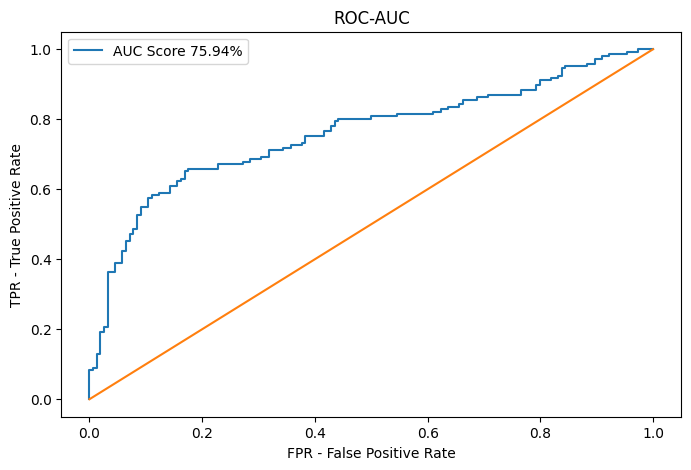

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC Score {np.round(auc_score, decimals=4)*100}%")
plt.plot([0, 1], [0, 1])
plt.title("ROC-AUC")
plt.xlabel("FPR - False Positive Rate")
plt.ylabel("TPR - True Positive Rate")
plt.legend()
plt.show()

In [28]:
y_prob

array([0.83490739, 0.74255145, 0.35746246, 0.47560284, 0.67460063,
       0.45862641, 0.63623708, 0.43914651, 0.66924068, 0.12251359,
       0.10889332, 0.79344295, 0.94728529, 0.85896657, 0.60571785,
       0.19115754, 0.32763517, 0.45938562, 0.48643272, 0.6320246 ,
       0.47648069, 0.4112087 , 0.40356917, 0.23344295, 0.85232286,
       0.4855866 , 0.58107905, 0.4631421 , 0.47370131, 0.5210001 ,
       0.43500678, 0.33612569, 0.35019161, 0.42303749, 0.3599488 ,
       0.70186719, 0.80397933, 0.67298696, 0.41094074, 0.65233642,
       0.84743075, 0.4109977 , 0.83400452, 0.10611789, 0.70021724,
       0.85867508, 0.40533658, 0.79737246, 0.47476099, 0.83928673,
       0.34672443, 0.72626492, 0.09820967, 0.28433349, 0.31285856,
       0.21830892, 0.52334393, 0.87132221, 0.81196135, 0.46275161,
       0.80746909, 0.32337291, 0.23950073, 0.5423232 , 0.2389893 ,
       0.86081365, 0.33241736, 0.885507  , 0.5677484 , 0.86882542,
       0.5005354 , 0.47597481, 0.7736834 , 0.65848111, 0.13179

In [46]:
y_pr_655_threshold = np.array([0 if i < 0.655 else 1 for i in y_prob])

In [47]:
y_pr_655_threshold

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [48]:
accuracy_score(y_te, y_pr_655_threshold)

0.7333333333333333

In [49]:
print(classification_report(y_te, y_pr_655_threshold))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78       154
           1       0.85      0.55      0.67       146

    accuracy                           0.73       300
   macro avg       0.77      0.73      0.72       300
weighted avg       0.76      0.73      0.72       300



In [50]:
confusion_matrix(y_te, y_pr_67_threshold)

array([[140,  14],
       [ 66,  80]], dtype=int64)

In [52]:
training_score = model.score(X_tr, y_tr)
training_score

0.69

In [54]:
testing_score = accuracy_score(y_te, y_pr)
testing_score

0.6933333333333334

In [55]:
## Cross Validation

In [57]:
kf = KFold(n_splits=10)

In [65]:
cvs = cross_val_score(estimator=LogisticRegression(), X=X_tr, y=y_tr, cv=kf,
                     n_jobs=-1, verbose=True, scoring="accuracy")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [66]:
cvs

array([0.71428571, 0.72857143, 0.6       , 0.67142857, 0.58571429,
       0.68571429, 0.78571429, 0.6       , 0.77142857, 0.64285714])

In [67]:
cross_validation_score = cvs.mean()

In [68]:
cross_validation_score

0.6785714285714286